# <font style="color:rgb(50,120,229)">Application 1 - Find the dominant colors in an image</font>

Imagine you are building a visual search engine for clothing in an online store where people can search for clothing by color. So every clothing item in your store will need to be tagged with the dominant color(s) of the clothing item. 

In this application, we will identify the dominant colors using the hue of colors in a photo and also learn an important concept called **Histogram**.

## <font style="color:rgb(50,120,229)">What is a Histogram?</font>
|
A histogram is a very important tool in Image processing. It is a graphical representation of the distribution of data. An **image histogram** gives a graphical representation of the tonal distribution in a digital image.

The x-axis indicates the range of values the variable can take. This range can be divided into a series of intervals called **_bins_**. The y-axis shows the count of how many values fall within that interval or bin. 

Before going into image histograms, let’s take a very simple example to illustrate what are histograms. 

Suppose we want to study the performance of students in a class of 50 students in a subject - Mathematics. The minimum and maximum performance scores are 0 and 100, respectively. The scores obtained by the 50 students are given below.

```
marks = [9, 7, 10, 15, 18, 21, 33, 35, 30, 31, 41, 46, 43, 41, 41, 42, 45, 41, 49, 45, 50, 51, 53, 53, 56,
         60, 64, 62, 65, 61, 65, 71, 72, 74, 71, 70, 71, 75, 72, 73, 72, 70, 83, 85, 87, 85, 82, 97, 100, 99 ]
```
<center>Marks obtained by 50 students in a class</center>

For computing the histogram, we divide the overall range of 100 scores into 10 bins so that 
1. scores 0-10 are in bin 1, 
1. scores 11-20 are in bin 2 and so on. 

The histogram simply counts the number of students with scores falling in a certain bin. For example, only 2 students got scores in the range 0-10. Thus, bin 1 has a count of 2. Similarly, bin 2 and 10 have counts of 3 and so on.

<table style="width:100%">
  <tr>
    <th style = "width:55%">   
         marks = [9, 7, 10, 15, 18,
         21, 33, 35, 30, 31,
         41, 46, 43, 41, 41,
         42, 45, 41, 49, 45,
         50, 51, 53, 53, 56,
         60, 64, 62, 65, 61, 
         65, 71, 72, 74, 71,
         70, 71, 75, 72, 73,
         72, 70, 83, 85, 87,
         85, 82, 97, 100, 99 ]
         </th>
    <th><center> <img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m1-histogramScore.png"/></center></th> 
  </tr>
  <tr>
      <td><center>Array containing scores of 50 students</center></td>
      <td><center>Histogram plot of scores obtained</center></td>
  </tr>
</table>

Just by looking at the histograms, we get a good idea about the distribution of data which is not possible by just looking at the array of numbers. For example,

- From the histogram plotted above, we can infer that a lot of students received scores in the ranges of 40-50 (10 students) and 70-80 (11 students). 
- It can also be seen that most students received a score of more than 40. 

#### <font style="color:rgb(8,133,37)">Note</font>  
We can change the bin size (10 marks) and accordingly the number of bins (10 bins) will also change. For a bin size of 5, the number of bins will become 20.

## <font style="color:rgb(50,120,229)">Image Histogram </font>
An image histogram is similar to what we discussed above. In case of image histogram,
- the x-axis represents the different intensity values or range of intensity values ( also called **bins** ), which lie between 0 and 255, and 
- the y-axis represents the **number of times a particular intensity value occurs in the image**.


## <font style="color:rgb(50,120,229)">Histograms using Matplotlib</font>
We will use the function [**`plt.hist()`**](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) available in the matplotlib library for drawing the histogram.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
```python
hist, bins, patches	=	plt.hist( x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None )
```

**Parameters**

There are many parameters in the function. Let us go over the most important and frequently used ones.

**Input**
- **`x`** - source image as an array
- **`bins`** - number of bins
- **`color`** - color for plotting the histogram

**Output**
- **`hist`** - histogram array
- **`bins`** - edges of bins

#### <font style="color:rgb(200,0,0)">NOTE </font>
The input to the function is an array ( not an image matrix ). Thus, we need to flatten the matrix into an array before passing it to the function.

## <font style="color:rgb(50,120,229)">Histogram Code</font>

In this program, we will find the histogram of the Hue Channel and plot it to see what major colors are present in the image.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from dataPath import DATA_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.interpolation']='bilinear'

In [3]:
filename = DATA_PATH+"images/jersey.jpg"

(-0.5, 384.5, 384.5, -0.5)

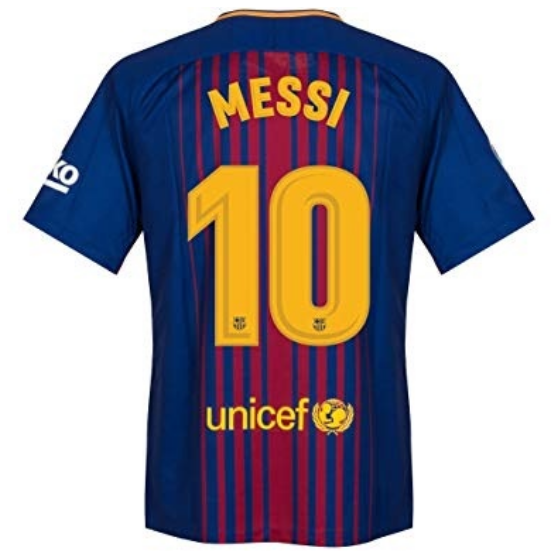

In [4]:
img = cv2.imread(filename)
plt.figure(figsize=[20,10])
plt.imshow(img[...,::-1])
plt.axis('off')

In [5]:

print("Image Dimensions = {}\n".format(img.shape))

Image Dimensions = (385, 385, 3)



Next, we convert the image to HSV Color space using the `cvtColor` function, convert the hsvImage to float32 and split the image into its channels H, S and V.

In [5]:
# Convert to HSV color space
hsvImage = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [6]:
# Split the channels
H, S, V = cv2.split(hsvImage)
print(H)
print(H.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(385, 385)


The background is white and we are not interested in that. So, let's remove all pixels with white / gray values. This can be easily done by not considering all pixels below a certain saturation.  

In [7]:
# Remove unsaturated (white/gray) pixels 
H_array = H[S > 10].flatten()

In [8]:
print(H_array)
print(H_array.shape)

[26 23 30 ... 92 45 39]
(85188,)


Text(0.5, 1.0, 'Histogram')

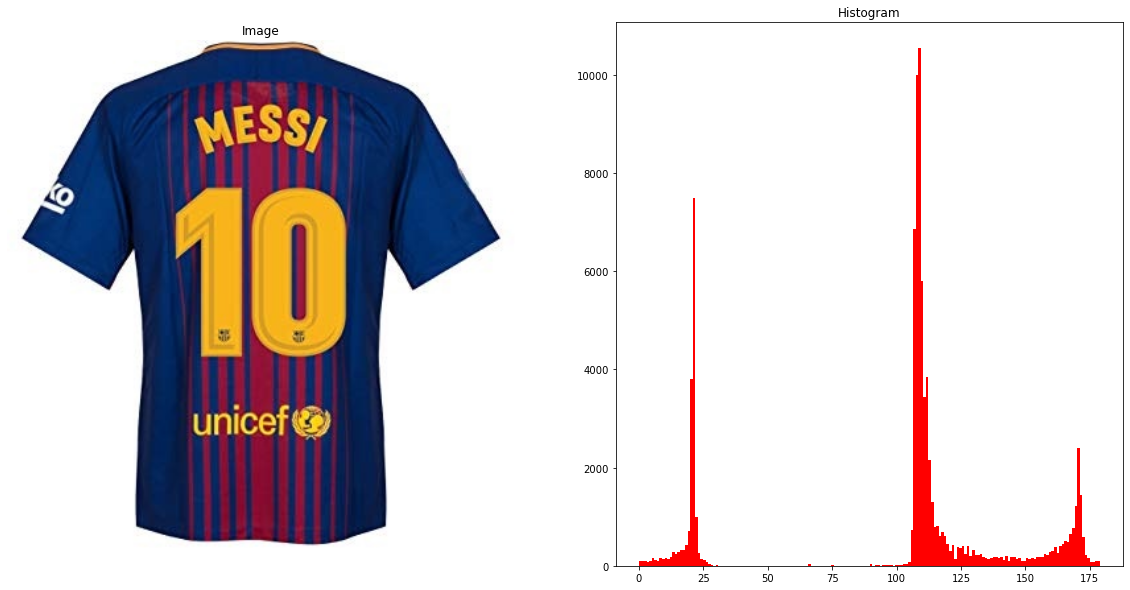

In [9]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Image");plt.axis('off')
plt.subplot(122);plt.hist(H_array, bins=180, color='r');plt.title("Histogram")

From the histogram plot, we can see that the peaks are at 23 (i.e. hue = 46, yellow-ish) , 110 (i.e. hue 220, blue-ish) and 170 (hue = 340, red-ish). These correspond to Red, Yellow, Green and Blue colors respectively. The highest peak is for blue since that is the most dominant color in the image.

Since now we know that colors have very specific Hue, we can use this knowledge to do color-based segmentation. You will implement a skin color detector as part of the project in the next week.